02 Regression
===
if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

# Simple Linear Regression
We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form
>y=ax+b

where **a** is commonly known as the slope, and **b** is commonly known as the intercept while **y** is the dependent (target) and **x** is the independent(feature) variable/s

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) #let's generate some random numbers of x
y = 2 * x - 5 + rng.randn(50) #let's plug the y=ax+b values with x to get

#let's create a dataframe to display this dataset
tmp_df = {}
tmp_df['x'] = x
tmp_df['y'] = y
print(pd.DataFrame(tmp_df).head())

          x         y
0  4.170220  2.653267
1  7.203245  8.561284
2  0.001144 -5.668959
3  3.023326  1.033987
4  1.467559 -3.182193


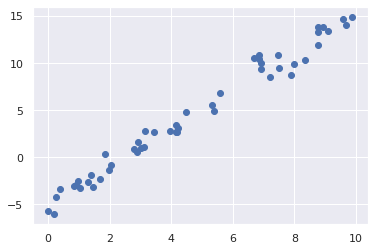

In [3]:
plt.scatter(tmp_df['x'],tmp_df['y']); #let's plot what it looks like (clue: it looks linear!)

# Scikit-Learn's Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the  [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

-   _Consistency_: All objects share a common interface drawn from a limited set of methods, with consistent documentation.
    
-   _Inspection_: All specified parameter values are exposed as public attributes.
    
-   _Limited object hierarchy_: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas  `DataFrame`s, SciPy sparse matrices) and parameter names use standard Python strings.
    
-   _Composition_: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.
    
-   _Sensible defaults_: When models require user-specified parameters, the library defines an appropriate default value.
    

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood. Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.


### Basics of the API[](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

1.  Choose a class of model by importing the appropriate estimator class from Scikit-Learn.

> from sklearn.linear_model import LinearRegression

2.  Choose model hyperparameters by instantiating this class with desired values.

> model = LinearRegression(fit_intercept=True)

3.  Arrange data into a features matrix and target vector following the discussion above.
4.  Fit the model to your data by calling the  `fit()`  method of the model instance.
5.  Apply the Model to new data:
    -   For supervised learning, often we predict labels for unknown data using the  `predict()`  method.
    -   For unsupervised learning, we often transform or infer properties of the data using the  `transform()`  or  `predict()`  method.

## Let's try it!
We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

In [6]:
from sklearn.linear_model import LinearRegression #implements ordinary least squares
model = LinearRegression(fit_intercept=True)

x = tmp_df['x'].reshape(50,-1) # reshape the input x so that it is acceptable by the model (a matrix of 50 samples of 1 feature)
y = tmp_df['y']

print("before: ",tmp_df['x'][0:5])
print("after: ",tmp_df['x'].reshape(50,-1)[0:5])

model.fit( x,y ) #fit the model

before:  [4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00
 1.46755891e+00]
after:  [[4.17022005e+00]
 [7.20324493e+00]
 [1.14374817e-03]
 [3.02332573e+00]
 [1.46755891e+00]]


LinearRegression()

In [7]:
# How does prediction work?

model.predict([[0]]) #pass 1 sample with 1 feature

array([-4.99857709])

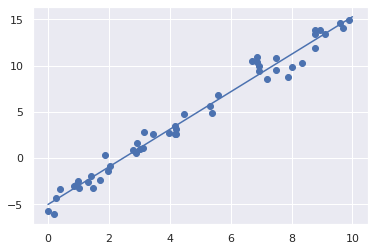

In [8]:
# Let's test this model

xnew = np.linspace(0, 10, 50) #generate 50 numbers between 0 and 10 that are evenly spaced
ypred = model.predict(xnew.reshape(50,-1))

plt.scatter(x, y) #let's do a scatter plot of the original dataset
plt.plot(xnew, ypred); #plot new xs and predicted ys to see how it fits the scatterplot of the original dataset

In [9]:
# Let's get some regression information

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

# Note not all regression models would be able to provide this information

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


# Model Evaluation

## R - Squared
is a statistical measure of how close the data are to the fitted regression line. It is also
known as the coefficient of determination, or the coefficient of multiple determination for multiple
regression. 


## MAE 
The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss

### What other evaluation metrics for regression exist?

In [12]:
from sklearn.metrics import r2_score,mean_absolute_error

yactual = 2 * xnew - 5 # let's compute our actual y based on the provided formula and compare to ypred

print("r2: ", r2_score(yactual, ypred)) # closer to 1 is good. that means the model is able to fit 
print("MAE: ", mean_absolute_error(yactual, ypred)) # closer to 0 is good. that means the predicted value from the actual value is not far off


r2:  0.9992702371163403
MAE:  0.1374669662502729


# Congrats! It's your first model. Notice anything?

Sklearn makes it so easy for anyone to do any type of prediction! (specially from a bunch of random numbers!).

How do we ensure that as **data scientists**, the models we are developing are valid? 

**CLUE**: some of these have already been discussed:
* Goodness of fit - is the model underfit/ overfit?
* Prediction accuracy - is the model able to predict accurately from unknown data?
* Usability - is the model designed in such a way that it is not too complex that it cannot be used

# Multiple Linear Regression

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable.

The method is broadly used to predict the behavior of the response variables associated to changes in the predictor variables, once a desired degree of relation has been established.


# height, hand and foot dataset
Let's do some playing around with a body length data set and see if there is any relationship between the length of hands and feet to one's height


In [13]:
# Let's do a quick analysis of an old NYC housing sale prices

height_df = pd.read_csv("https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/stature_hand_foot.csv")

In [14]:
del height_df['idGen']
height_df.head()

,gender,height,handLen,footLen
0,1,1829.356,205.7455,294.1762
1,1,1730.262,197.5946,283.2275
2,1,1723.990,193.6019,238.9127
3,1,1748.885,224.5994,289.4070
4,1,1697.573,200.8021,247.0631


In [15]:
height_df.describe() # check if there are any missing values

,gender,height,handLen,footLen
count,155.000000,155.000000,155.000000,155.00000
mean,1.483871,1677.514852,199.489678,249.10355
std,0.501360,93.913266,13.341823,18.54731
min,1.000000,1478.364000,167.634800,205.04120
25%,1.000000,1603.108000,189.516600,236.43255
50%,1.000000,1670.996000,199.565100,250.27810
75%,2.000000,1750.701500,209.265850,262.70260
max,2.000000,1916.381000,228.851200,306.55980


# Let's quickly build a baseline model

In [18]:
from sklearn.linear_model import LinearRegression #implements ordinary least squares
model = LinearRegression(fit_intercept=True)

x = height_df[['handLen','footLen']].to_numpy()
y = height_df['height']



### Hold out method
how do we ensure that our model would be able to generalize where it can handle unknown data? aka prevent overfitting

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print("X_train data:",X_train.shape)
print("y_train data:",y_train.shape)
print("X_test data:",X_test.shape)
print("y_test data:",y_test.shape)

# now we have a test data that is "unknown" to the model that we can later use to compare if it was able to predict accurately

X_train data: (103, 2)
y_train data: (103,)
X_test data: (52, 2)
y_test data: (52,)


In [21]:
print("before: ",height_df[['handLen','footLen']].head())
print("after: ",height_df[['handLen','footLen']].to_numpy()[0:5])

model.fit( X_train,y_train ) #fit the model

before:      handLen   footLen
0  205.7455  294.1762
1  197.5946  283.2275
2  193.6019  238.9127
3  224.5994  289.4070
4  200.8021  247.0631
after:  [[205.7455 294.1762]
 [197.5946 283.2275]
 [193.6019 238.9127]
 [224.5994 289.407 ]
 [200.8021 247.0631]]


LinearRegression()

In [22]:
# Let's do a sample prediction

model.predict([[200,200]]) # if you hands and feet are both 200 in length, then your height is...

array([1556.1192721])

In [23]:
y_pred = model.predict(X_test)
print("y_pred data:", y_pred.shape)

y_pred data: (52,)


In [24]:
# let's quickly look at some metrics

print("r2: ", r2_score(y_test , y_pred )) # closer to 1 is good. that means the model is able to fit 
print("MAE: ", mean_absolute_error(y_test, y_pred)) # closer to 0 is good. that means the predicted value from the actual value i

r2:  0.807997431739673
MAE:  26.309969822149828


### What assumptions are required for a Linear Regression to be valid?

- **Linear relationship** - First, linear regression needs the relationship between the independent and dependent variables to be linear.  It is also important to check for outliers since linear regression is sensitive to outlier effects.  The linearity assumption can best be tested with scatter plots, the following two examples depict two cases, where no and little linearity is present.
- **Multivariate normality** - Here we will use a histogram to check if the variables have normal distribution. If not, we might need to apply feature engineering ie. log transform to see if it will adjust.
- **No or little multicollinearity** - linear regression assumes that there is little or no multicollinearity in the data.  Multicollinearity occurs when the independent variables are too highly correlated with each other.
- **No auto-correlation** - Autocorrelation occurs when the residuals are not independent from each other.  For instance, this typically occurs in stock prices, where the price is not independent from the previous price. CLUE: is this a timeseries dataset?
- **Homoscedasticity** is present when the noise of your model can be described as random and the same throughout all independent variables. If by looking at the scatterplot of the residuals from your linear regression analysis you notice a pattern, this is a clear sign that this assumption is being violated. 

-- WARNING - if any of the above items are violated, it would be hard to trust your LR results!

### Linear relationship check

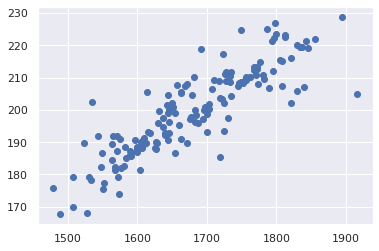

In [25]:
plt.scatter(height_df['height'],height_df['handLen']) # looks like there is a linear relationship between height and hand

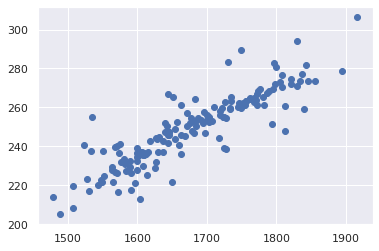

In [26]:
plt.scatter(height_df['height'],height_df['footLen']) # looks like there is a linear relationship between height and hand

### Normality Check

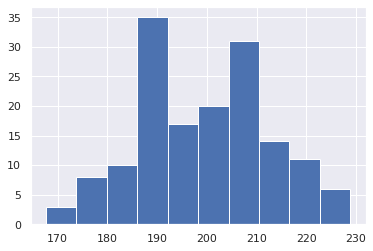

In [27]:
height_df['handLen'].hist()

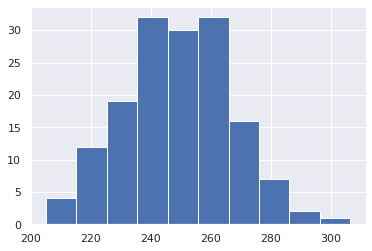

In [28]:
height_df['footLen'].hist()

### Multicollinearity Check

In [29]:
height_df[['height','footLen']].corr() # since correlation coefficients are less than 1, we are ok. 
# note: there are other ways to also check for multicolllinearity besides correlation matrix

,height,footLen
height,1.000000,0.881311
footLen,0.881311,1.000000


### Auto correlation Check
not a timeseries dataset! :)

### Homoscedasticity Check
Let's compute the residuals and plot to a scatter graph and lets see if it looks random or not! #we want it to look random

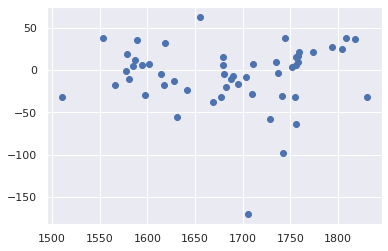

In [30]:
residuals = y_test-y_pred

plt.scatter(x=y_pred,y=residuals) #looks sort of random !

# Non Linear Regression

In statistics, nonlinear regression is a form of regression analysis in which observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables.

In [31]:
housing_df = pd.read_csv("https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/housing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [33]:
housing_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [34]:
housing_df[['total_rooms','median_income','median_house_value']]

,total_rooms,median_income,median_house_value
0,880.0,8.3252,452600.0
1,7099.0,8.3014,358500.0
2,1467.0,7.2574,352100.0
3,1274.0,5.6431,341300.0
4,1627.0,3.8462,342200.0
...,...,...,...
20635,1665.0,1.5603,78100.0
20636,697.0,2.5568,77100.0
20637,2254.0,1.7000,92300.0
20638,1860.0,1.8672,84700.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


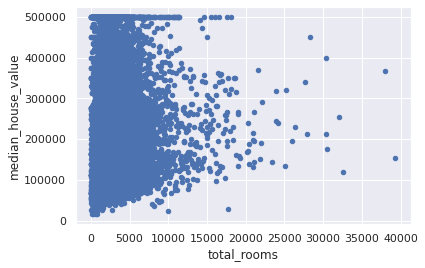

In [35]:
housing_df[['total_rooms','median_house_value']].plot.scatter(x='total_rooms',y='median_house_value')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


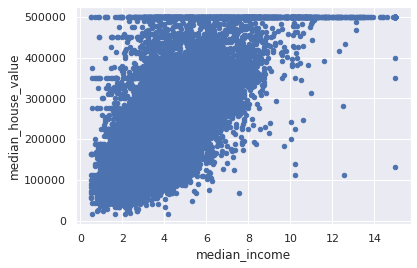

In [36]:
housing_df[['median_income','median_house_value']].plot.scatter(x='median_income',y='median_house_value')

In [37]:
X = housing_df[['median_income','total_rooms']].to_numpy()
y = housing_df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Polynomial regression: extending linear models with basis functions

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients.

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2) # example of feature processing
X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression(normalize = True)

pol_reg.fit(X_poly, y_train)


# Predict
X_p = poly_reg.fit_transform(X_test)
y_predicted = pol_reg.predict(X_p)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


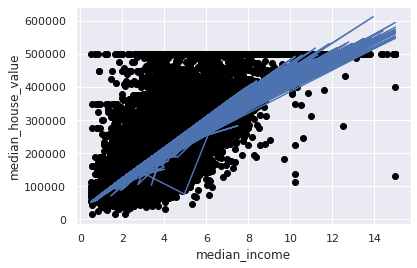

In [39]:
plt.scatter( X_train[:,0], y_train,color="black")
plt.plot( X_test[:,0], y_predicted)
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

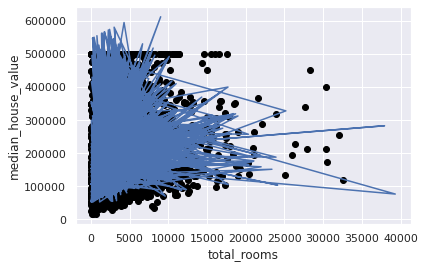

In [40]:
plt.scatter( X_train[:,1], y_train,color="black")
plt.plot( X_test[:,1], y_predicted)
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error



# model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)

# printing values
print('Slope:' ,pol_reg.coef_)
print('Intercept:', pol_reg.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 0.00000000e+00  5.09798971e+04 -2.74001314e+00 -1.09386148e+03
  9.99668976e-01 -1.70434549e-04]
Intercept: 27606.5903324261
Root mean squared error:  83346.30015911571
R2 score:  0.47871466184452627


## KernelRidge 
Kernel ridge regression (KRR) combines ridge regression (linear least squares with l2-norm regularization) with the kernel trick. It is an example of a non-linear regression algorithm where we cannot derive the coefficient and intercept values.

In [42]:
from sklearn.kernel_ridge import KernelRidge

reg = KernelRidge(alpha=1.0)

reg.fit(X_train, y_train)


y_predicted = reg.predict(X_test)

In [43]:
# model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
r2 = r2_score(y_test, y_predicted)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  85997.4382035932
R2 score:  0.4450244033393329


## What other regression estimators exist in the Scikit Learn package?
in what situations are they best used?

# Modeling recap

This assumes you have done all steps including EDA
1. Import relevant packages
2. Review dataset and apply necessary feature engineering
3. set X and y variables 
4. setup holdout strategy: Train-test Split  
5. Create model and call fit function on training set
6. run predict on test set 
6. Evaluate results and iterate as necessary (ensure modeling assumptions hold true!) 
7. Identify champion model  

    
# Exploring the Data Science Community


- [Machine Learning - Reddit](https://www.reddit.com/r/MachineLearning/)

    The Reddit Machine Learning Community is one of the largest communities that is meant for industry professionals and is focused on practical aspects of building artificial intelligence systems.

- [Data Science - Reddit](https://www.reddit.com/r/datascience)

    A place for data science practitioners and professionals to discuss and debate data science career questions.

- [Machine Learning and Data Science - LinkedIn](https://www.linkedin.com/groups/4298680/)

    Largest Machine learning and Data Science community group in LinkedIn.

- [datasciencephilippines - FB Group](https://www.facebook.com/groups/datasciencephilippines/)

    This is a community moderated by Isaac Reyes and team.

- [Analytics Associatoin of the Philippines - FB Group](https://www.facebook.com/groups/aap.public.forum/)

    This is a community group run and moderated by AAP.


PS. Don't forget [StackOverflow](https://stackoverflow.com/), [GitHub](https://www.kaggle.com/), and [Kaggle](https://github.com/)!

<!-- -->
